# Exploratory Data Analysis (EDA)

H&M Kaggle Competition: https://www.kaggle.com/c/h-and-m-personalized-fashion-recommendations/overview

The Kaggle Challenge provide a total of 4 datasets:
- articles.csv: contains all H&M available articles and their features
- customers.csv: contains data of the H&M customers
- transactions.csv: contains the customers transactions during 104 consecutive weeks
- /images: contains images of the articles. Not used for this project

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

# 1. Exploring articles.csv

## 1.1. Read Data

In [3]:
articles = pd.read_csv("data/articles.csv")
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [3]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

## 1.2 Check Null values

In [5]:
total = articles.isnull().sum().sort_values(ascending=False)
percent = (articles.isnull().sum()/articles.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total Missing', 'Percent'])
missing_data

,Total Missing,Percent
detail_desc,416,0.003942
perceived_colour_master_name,0,0.000000
garment_group_name,0,0.000000
garment_group_no,0,0.000000
section_name,0,0.000000
section_no,0,0.000000
index_group_name,0,0.000000
index_group_no,0,0.000000
index_name,0,0.000000
index_code,0,0.000000


*detail_desc* is the only column with NAs (416 NA values)

## 1.3 Summary statistics

All of the features are categorical so we don't need summary statisics.

Let's check the different levels oft he categorical features:

In [6]:
articles.nunique() # Number of unique values in each column

article_id                      105542
product_code                     47224
prod_name                        45875
product_type_no                    132
product_type_name                  131
product_group_name                  19
graphical_appearance_no             30
graphical_appearance_name           30
colour_group_code                   50
colour_group_name                   50
perceived_colour_value_id            8
perceived_colour_value_name          8
perceived_colour_master_id          20
perceived_colour_master_name        20
department_no                      299
department_name                    250
index_code                          10
index_name                          10
index_group_no                       5
index_group_name                     5
section_no                          57
section_name                        56
garment_group_no                    21
garment_group_name                  21
detail_desc                      43404
dtype: int64

## 1.4 Visualize Data

In [7]:
import re

# regex pattern: find all columns names with _name
pattern = '.*_name.*'
# dict comprehension: Sets all columns with '_id', '_code', or '_no' to str type
name_vars = [column for column in articles.columns if re.match(pattern, column)]
#print(name_vars)

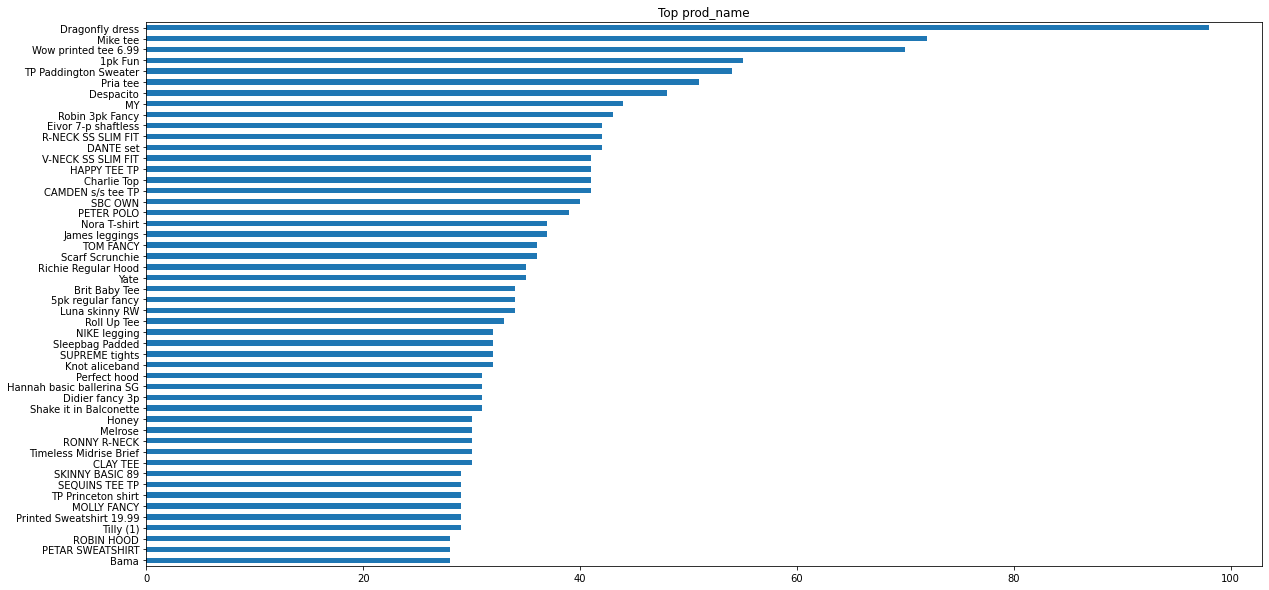

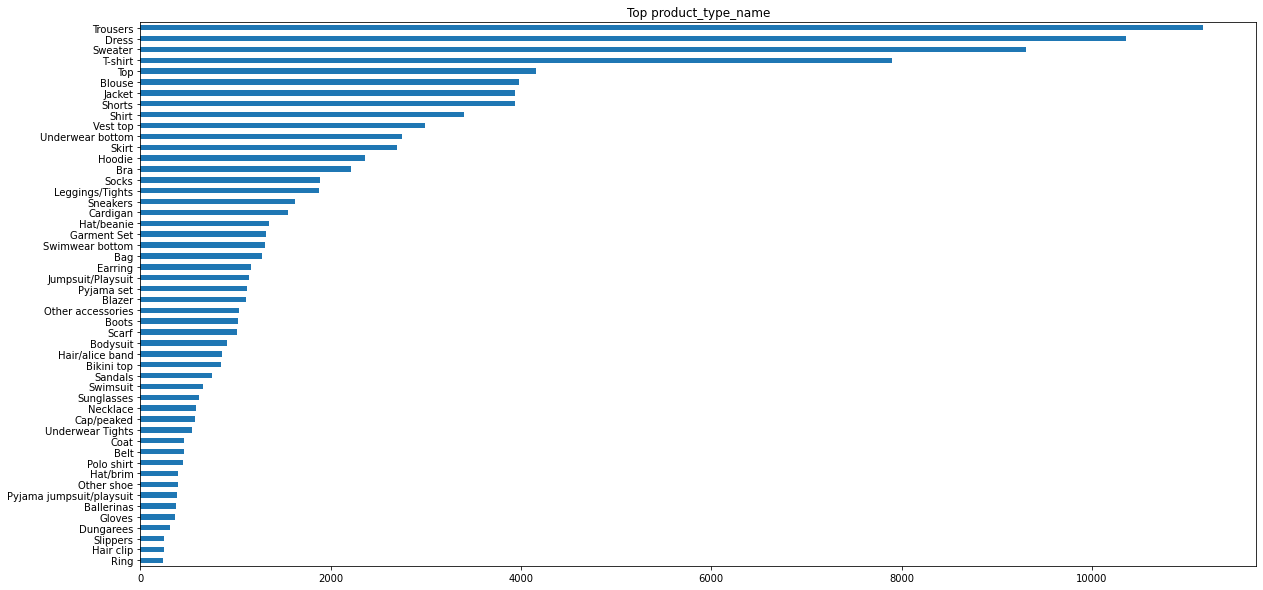

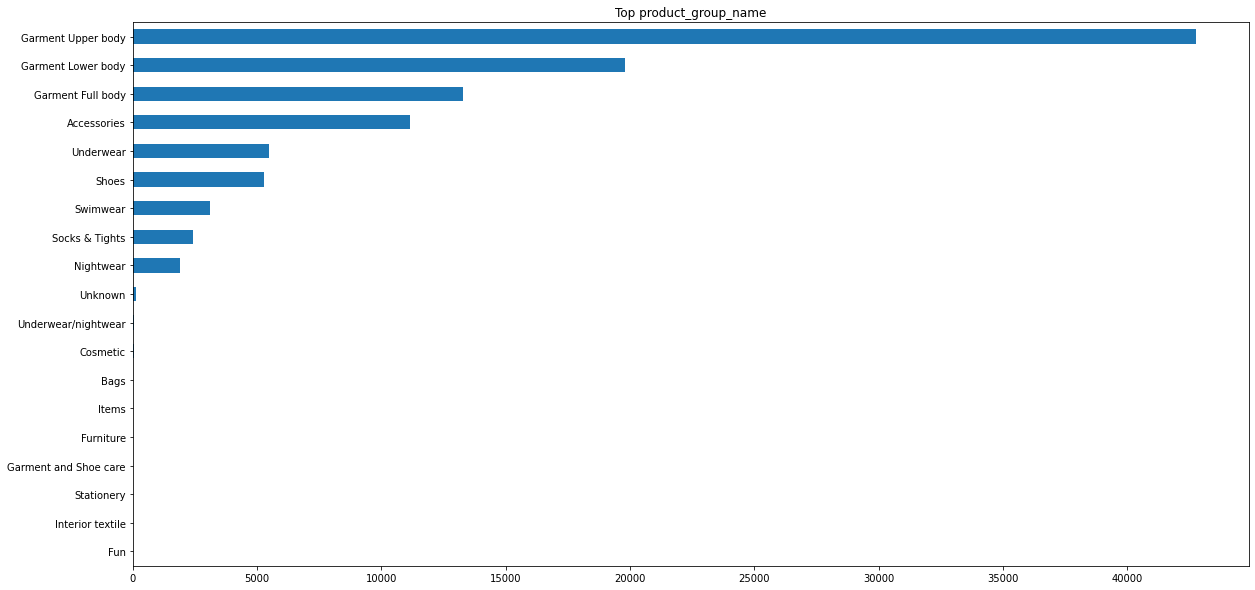

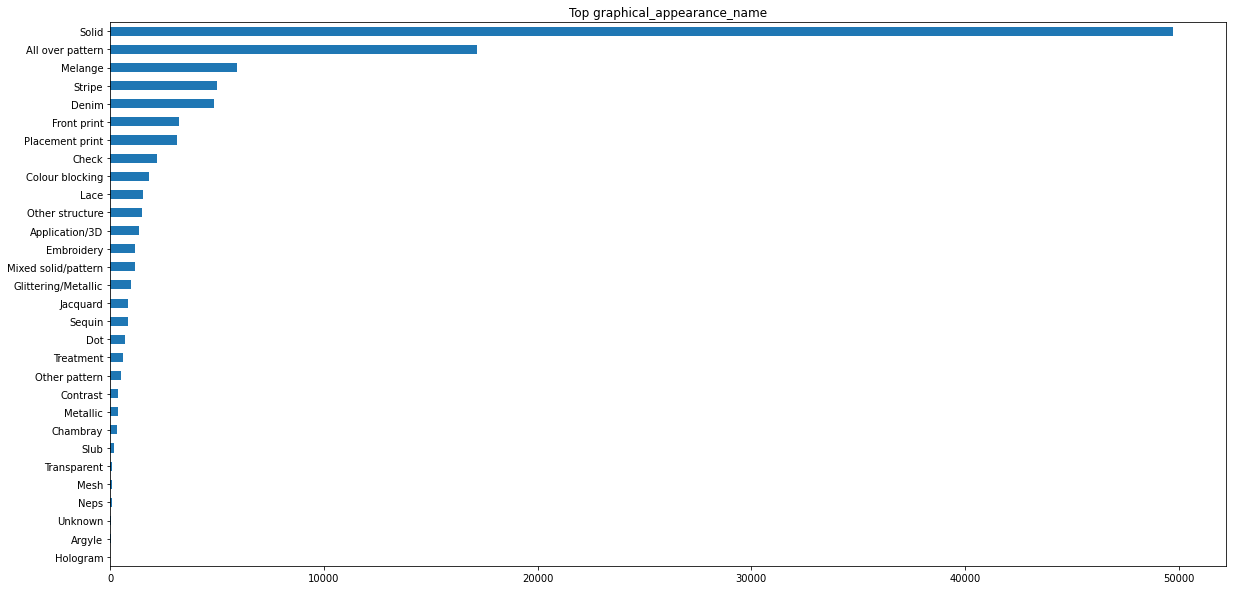

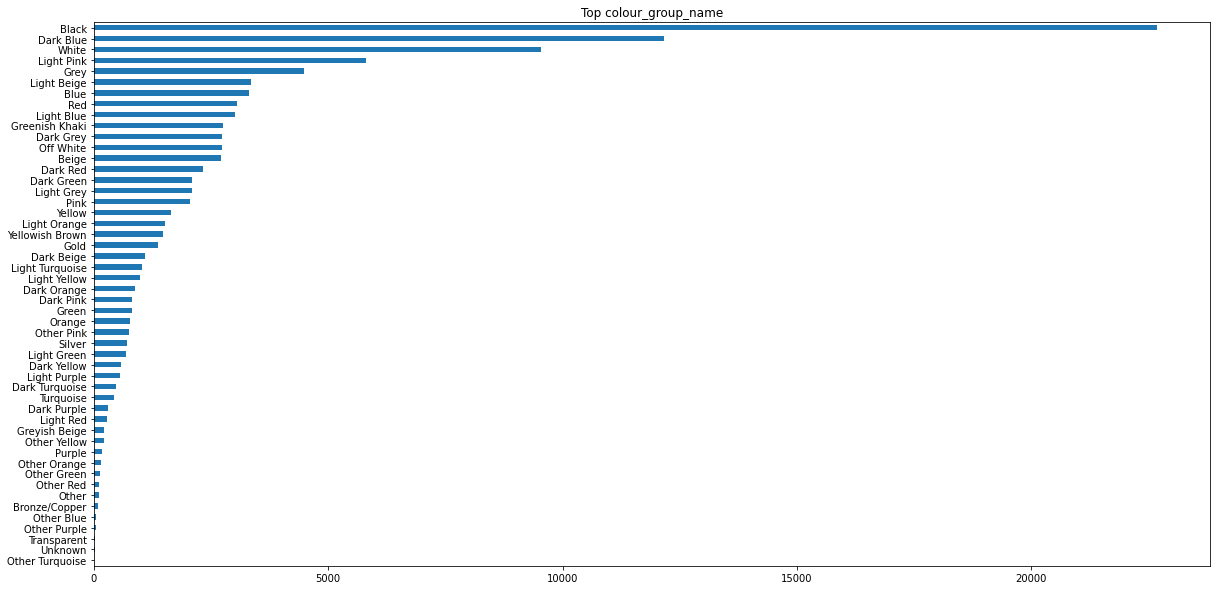

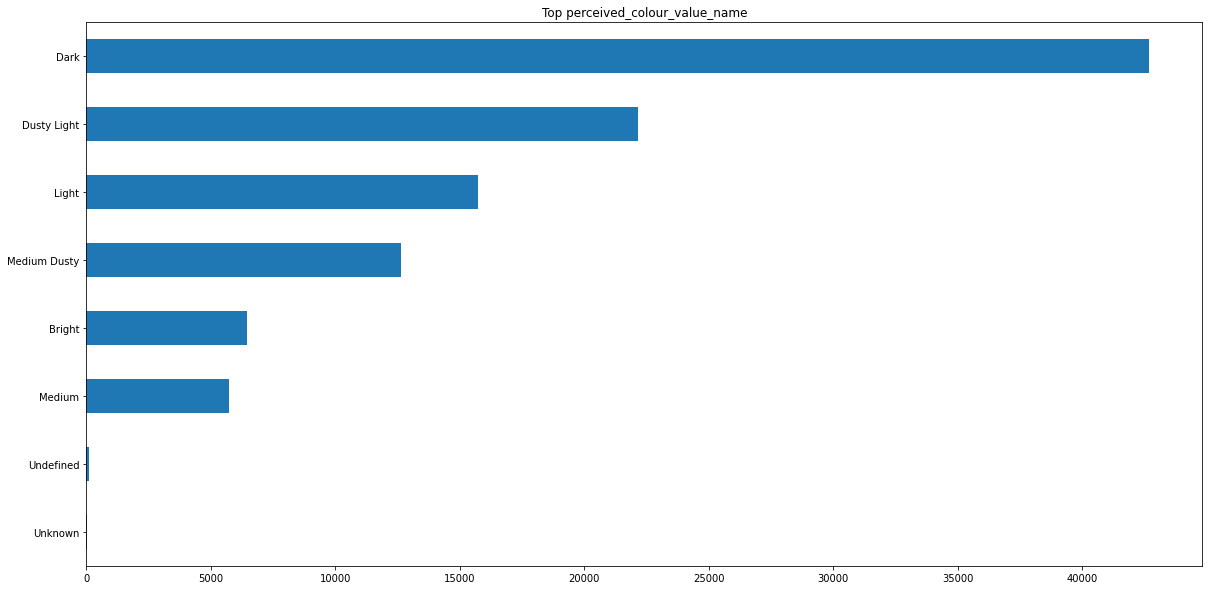

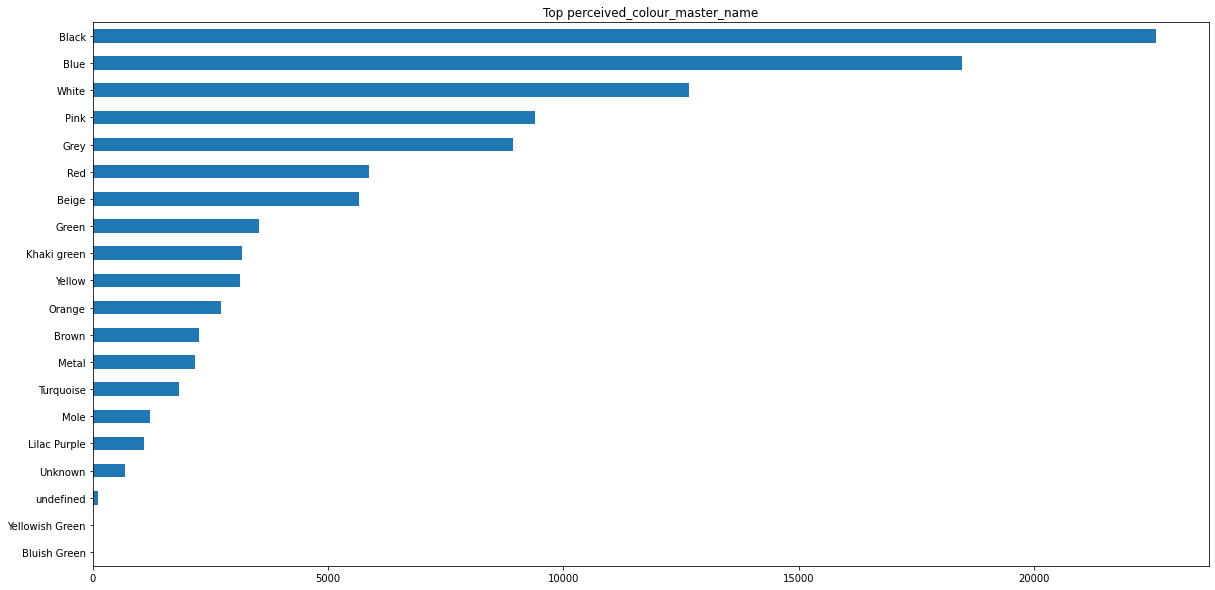

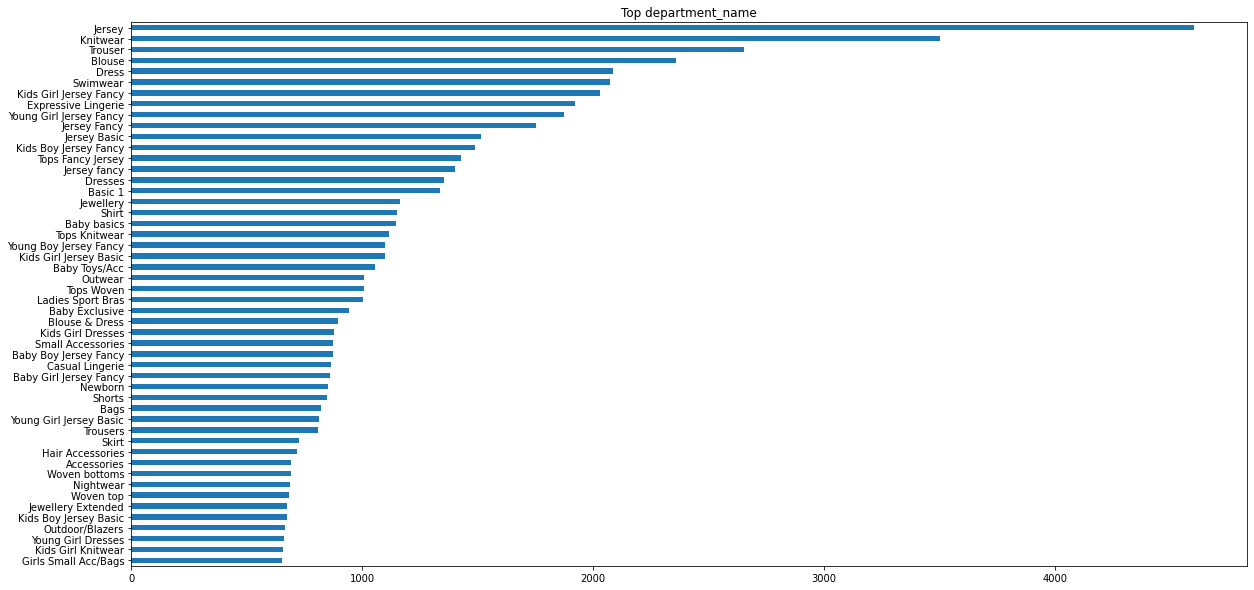

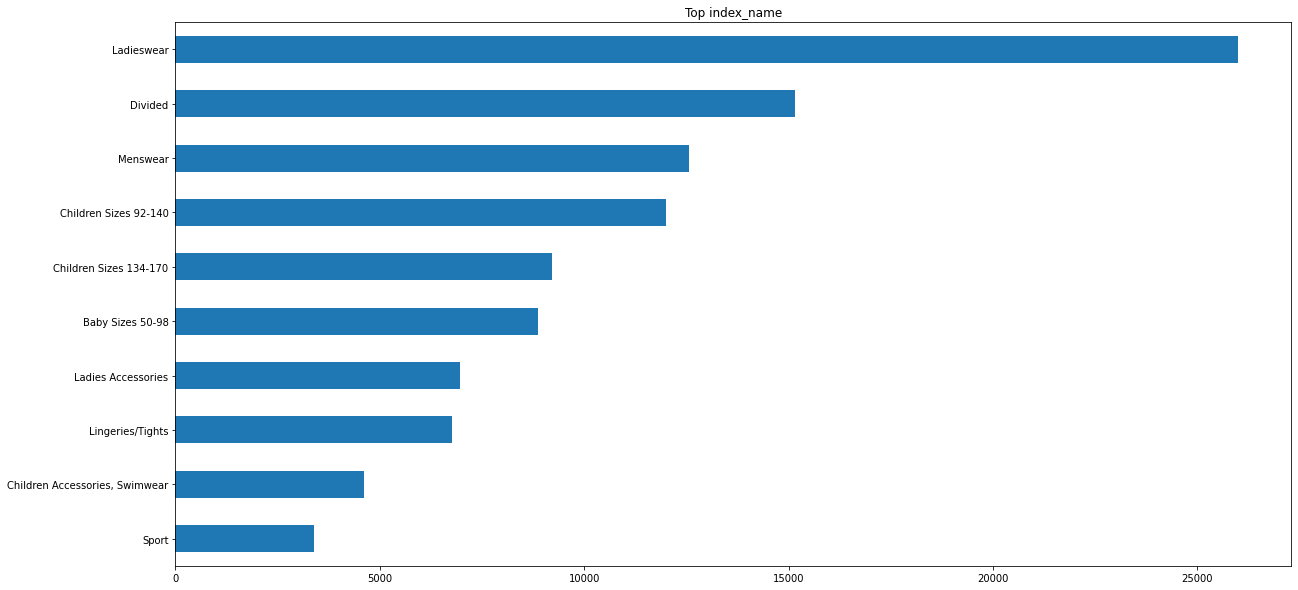

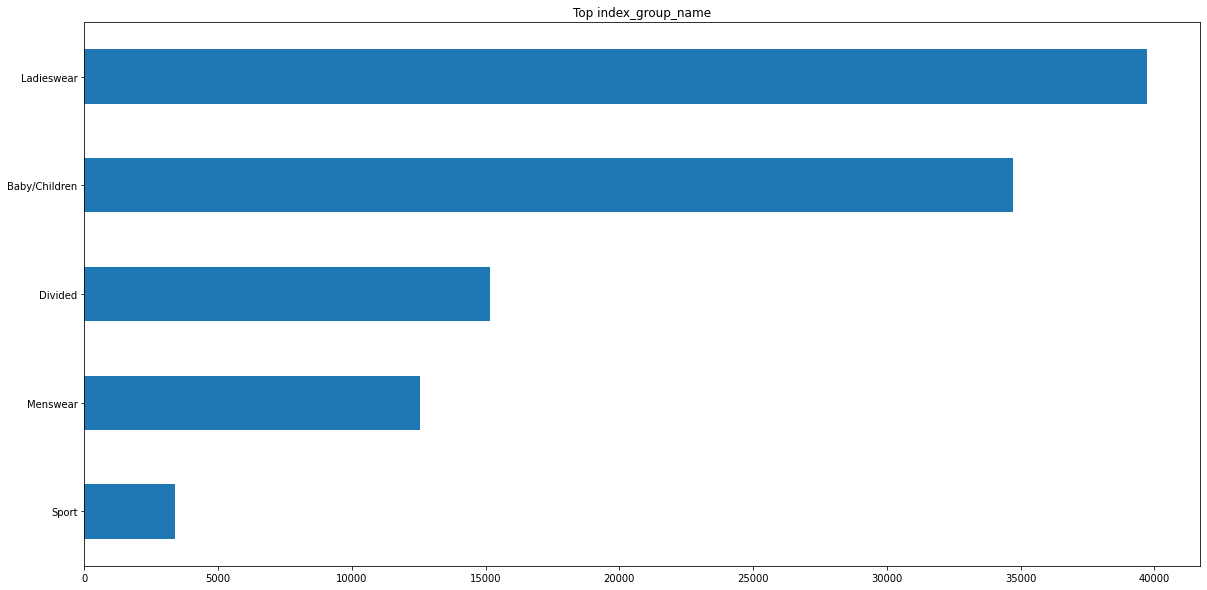

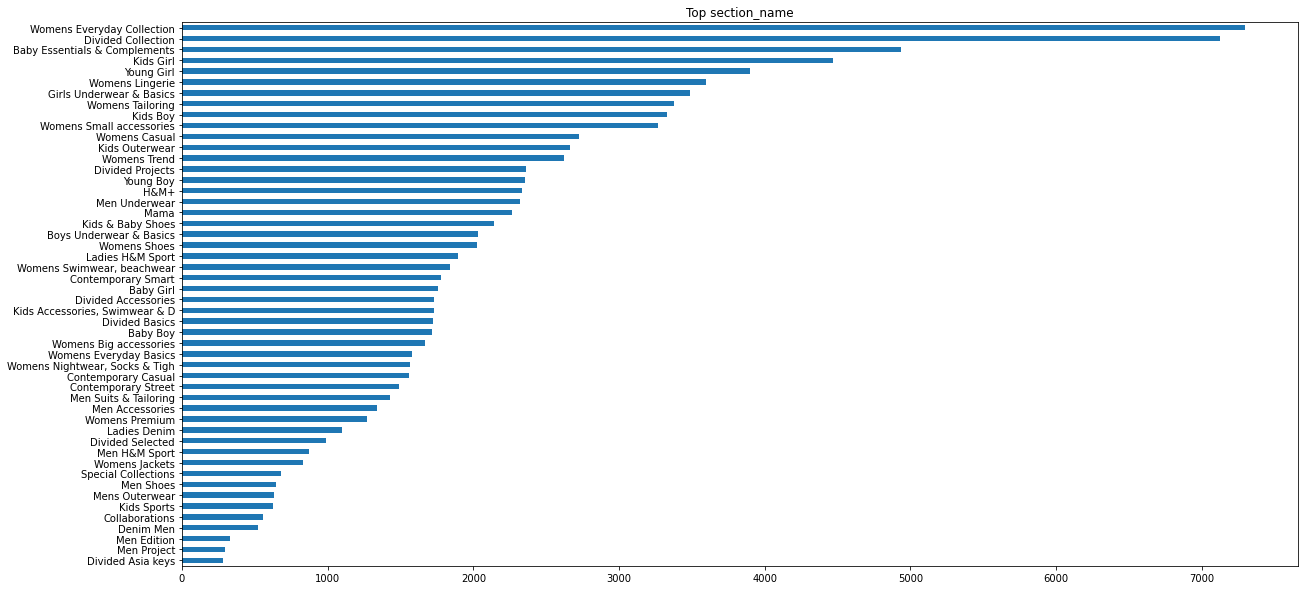

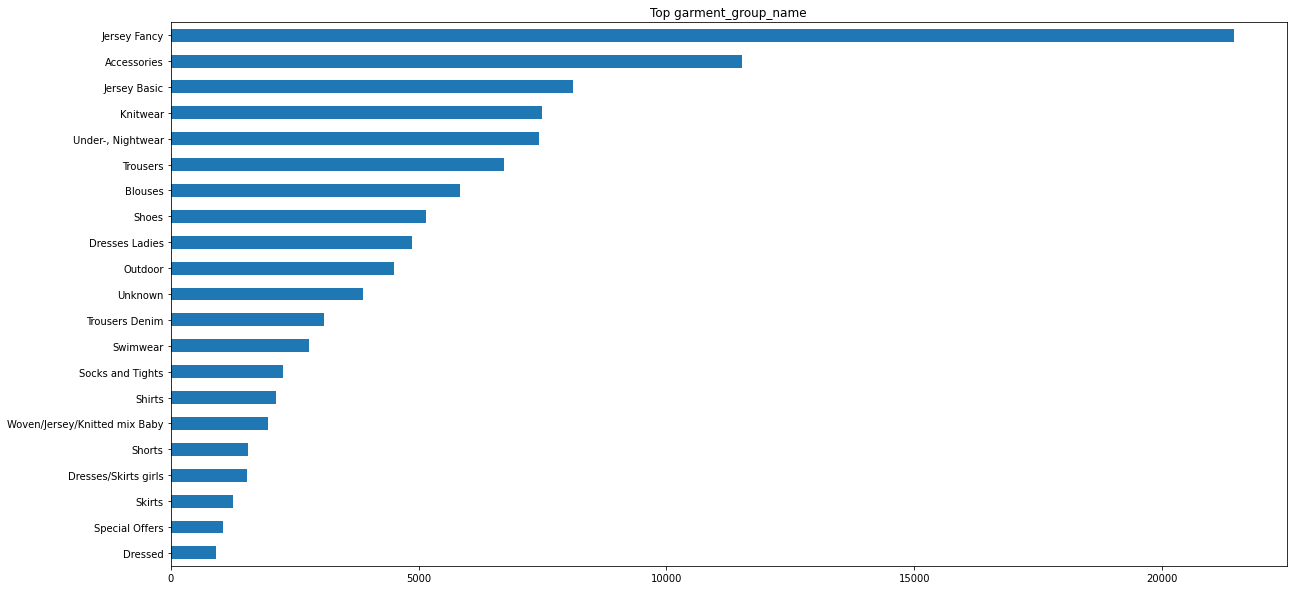

In [8]:
for column in name_vars: 
    plt.figure()
    articles[column] \
        .value_counts()[:50] \
        .sort_values() \
        .plot(figsize = (20, 10), kind='barh', title = 'Top {}'.format(column))
    plt.show()

# 2. Exploring customers.csv

## 2.1 Read Data

In [10]:
customers = pd.read_csv("data/customers.csv")

In [11]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [12]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


## 2.2 Check Null values

In [13]:
total = customers.isnull().sum().sort_values(ascending=False)
percent = (customers.isnull().sum()/customers.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total Missing', 'Percent'])
missing_data

,Total Missing,Percent
Active,907576,0.661508
FN,895050,0.652378
fashion_news_frequency,16009,0.011669
age,15861,0.011561
club_member_status,6062,0.004418
customer_id,0,0.000000
postal_code,0,0.000000


We are missing some customer's age, fashion news frequency, etc. The only columns with no null values are customer id and postal code.

## 2.3 Summary Statistics

Get unique values for each category

In [16]:
customers.nunique()

customer_id               1371980
FN                              1
Active                          1
club_member_status              3
fashion_news_frequency          4
age                            84
postal_code                352899
dtype: int64

The only numerical variable is age. Let's get its statistics:

In [16]:
customers["age"].describe()

count    1.356119e+06
mean     3.638696e+01
std      1.431363e+01
min      1.600000e+01
25%      2.400000e+01
50%      3.200000e+01
75%      4.900000e+01
max      9.900000e+01
Name: age, dtype: float64

## 2.4 Visualize Data

### 2.4.1 Categorical Variables

In [17]:
customers['fashion_news_frequency'].value_counts()

NONE         877711
Regularly    477416
Monthly         842
None              2
Name: fashion_news_frequency, dtype: int64

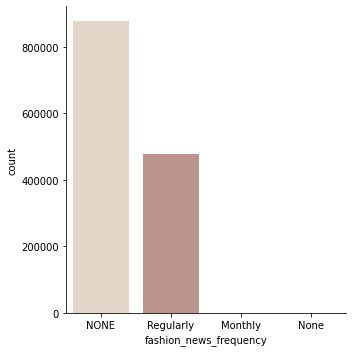

In [39]:
sns.catplot(x='fashion_news_frequency', kind="count", palette="ch:.25", data=customers)
plt.show()

fashion_news_frequency has four levels

In [18]:
customers['FN'].value_counts()

1.0    476930
Name: FN, dtype: int64

Since FN has only one level(1), we assume that NaN values correspond to level 0. So FN has actually two levels: 0 and 1

In [19]:
customers['club_member_status'].value_counts()

ACTIVE        1272491
PRE-CREATE      92960
LEFT CLUB         467
Name: club_member_status, dtype: int64

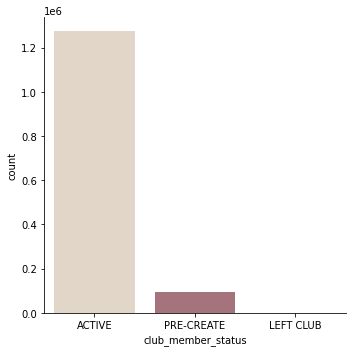

In [28]:
sns.catplot(x='club_member_status', kind="count", palette="ch:.25", data=customers)
plt.show()

club_member_status has three levels

In [21]:
customers['Active'].value_counts()

1.0    464404
Name: Active, dtype: int64

Since Active has only one level (1), we assume that NaN values correspond to level 0. So FN has actually two levels: 0 and 1

### 2.4.2 Numerical Variables

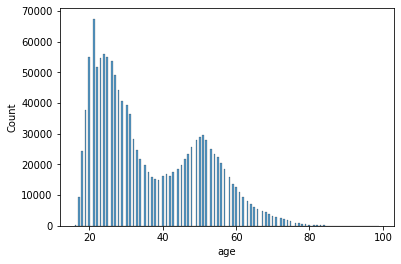

In [36]:
sns.histplot(x='age', palette="ch:.25", data=customers)
plt.show()

# 3. Exploring transactions_train.csv

## 3.1 Read Data

In [40]:
transactions = pd.read_csv("data/transactions_train.csv")

In [41]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [42]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


## 3.2 Check Null values

In [43]:
total = transactions.isnull().sum().sort_values(ascending=False)
percent = (transactions.isnull().sum()/transactions.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total Missing', 'Percent'])
missing_data

,Total Missing,Percent
t_dat,0,0.0
customer_id,0,0.0
article_id,0,0.0
price,0,0.0
sales_channel_id,0,0.0


We have no missing data

## 3.3 Summary statistics

The only numerical variable is price. Let's get its statistics:

In [44]:
transactions["price"].describe()

count    3.178832e+07
mean     2.782927e-02
std      1.918113e-02
min      1.694915e-05
25%      1.581356e-02
50%      2.540678e-02
75%      3.388136e-02
max      5.915254e-01
Name: price, dtype: float64

## 3.4 Visualize Data

### 3.4.1 Categorical Variables

In [45]:
transactions['sales_channel_id'].value_counts()

2    22379862
1     9408462
Name: sales_channel_id, dtype: int64

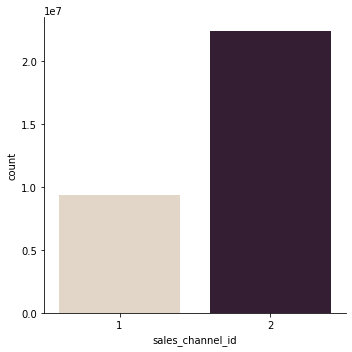

In [46]:
sns.catplot(x='sales_channel_id', kind="count", palette="ch:.25", data=transactions)
plt.show()

Sales Channel has two categories: 1 and 2. We assume they refear to Online and Onsite sales.

### 3.4.2 Numerical Variables

Each transaction corresponds to the purchase of one single article, so this graph gives us an idea of the average price of the H&M products.

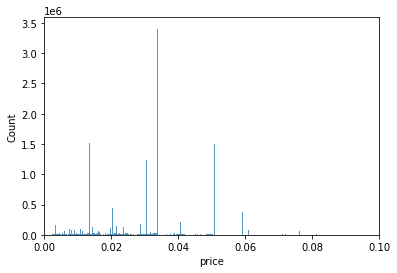

In [48]:
sns.histplot(x='price', palette="ch:.25", data=transactions, )
plt.xlim(0, 0.1)
plt.show()

# 4. Further Exploration and Visualizations

## 4.1 Most ordered products

In [59]:
#Get counts of each sold article
grouped = transactions.groupby("article_id")["article_id"].count().reset_index(name='counts')
grouped

,article_id,counts
0,108775015,10841
1,108775044,7250
2,108775051,215
3,110065001,1044
4,110065002,539
...,...,...
104542,952267001,41
104543,952938001,9
104544,953450001,17
104545,953763001,35


In [60]:
purchased_articles = pd.merge(grouped, articles[['article_id', 'prod_name']], how='left', on=['article_id'])
purchased_articles = purchased_articles.sort_values(by='counts', ascending=False)[:20]
purchased_articles

,article_id,counts,prod_name
53832,706016001,50287,Jade HW Skinny Denim TRS
53833,706016002,35043,Jade HW Skinny Denim TRS
1711,372860001,31718,7p Basic Shaftless
24808,610776002,30199,Tilly (1)
70124,759871002,26329,Tilda tank
3706,464297007,25025,Greta Thong Mynta Low 3p
1712,372860002,24458,7p Basic Shaftless
24807,610776001,22451,Tilly (1)
2233,399223001,22236,Curvy Jeggings HW Ankle
53834,706016003,21241,Jade HW Skinny Denim TRS


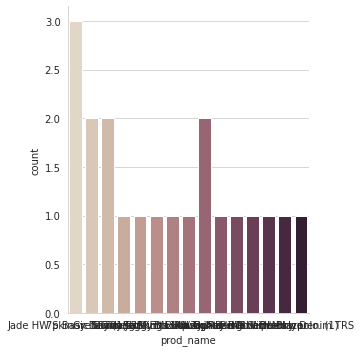

In [61]:
sns.catplot(x='prod_name', kind="count", palette="ch:.25", data=purchased_articles)
plt.show()

## 4.2 Number of articles purchased by the customers

In [52]:
#Number of products purchased by each customer
grouped = transactions.groupby("customer_id")["customer_id"].count().reset_index(name='counts')

In [53]:
grouped

,customer_id,counts
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,21
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,86
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,18
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,2
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,13
...,...,...
1362276,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,51
1362277,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,84
1362278,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,45
1362279,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,7


In [54]:
articles_purchased = grouped.groupby("counts")["counts"].count().reset_index(name='number_people').sort_values(by='counts', ascending=False)
articles_purchased

,counts,number_people
746,1895,1
745,1441,1
744,1364,1
743,1361,1
742,1237,1
...,...,...
4,5,64635
3,4,82082
2,3,95686
1,2,127441


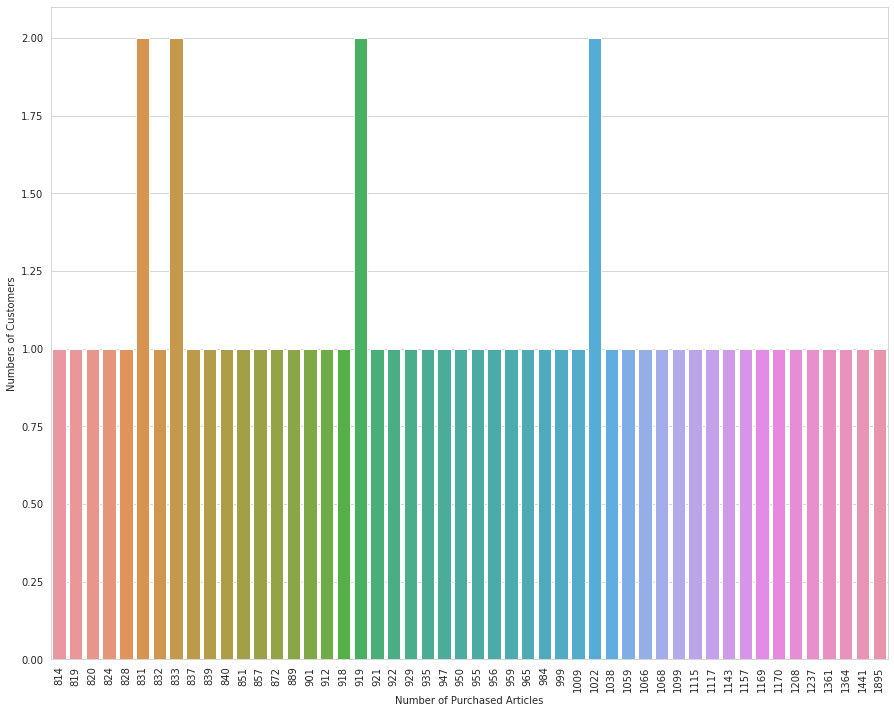

In [55]:
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(15, 12))
sns.barplot(x = articles_purchased.counts[0:50], y = articles_purchased.number_people[0:50])
plt.ylabel('Numbers of Customers')
plt.xlabel('Number of Purchased Articles')
plt.xticks(rotation='vertical')
plt.show()

The majority of the clients buy 1 or 2 articles.